In [ ]:
#importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt

# Loading Datasets

In [ ]:
data_movie = pd.read_csv("movie.csv") #Datset eccontaining movie names
data_rating = pd.read_csv("rating.csv") #Dataset with rating of the movies given by each user

# Data Modelling

In [ ]:
data_movie.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
data_movie.shape

(27278, 3)

In [ ]:
#n collaborative filtering we dont ned the content of the item.
data_movie.drop(['genres'],axis=1,inplace=True)

In [ ]:
data_rating.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [ ]:
#droping timesttamp column
data_rating = data_rating.loc[:,["userId","movieId","rating"]]
data_rating.head()

,userId,movieId,rating
0,1,2.0,3.5
1,1,29.0,3.5
2,1,32.0,3.5
3,1,47.0,3.5
4,1,50.0,3.5


We will merge the movie and rating dataset


In [ ]:
df = pd.merge(data_movie,data_rating)
df.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),3,4.0
1,1,Toy Story (1995),6,5.0
2,1,Toy Story (1995),8,4.0
3,1,Toy Story (1995),10,4.0
4,1,Toy Story (1995),11,4.5


In [ ]:
df.describe()

,movieId,userId,rating
count,382522.000000,382522.000000,382522.000000
mean,8420.205005,1309.954314,3.511088
std,18739.976508,744.927218,1.060277
min,1.000000,1.000000,0.500000
25%,904.000000,664.000000,3.000000
50%,2144.000000,1302.000000,3.500000
75%,4623.000000,1969.000000,4.000000
max,130490.000000,2605.000000,5.000000


# Analysing the data

The movies which have been rated by most number of users:

In [ ]:
df.groupby("title").count()["rating"].sort_values(ascending=False).head(20)

title
Pulp Fiction (1994)                                      1286
Forrest Gump (1994)                                      1265
Shawshank Redemption, The (1994)                         1177
Silence of the Lambs, The (1991)                         1173
Jurassic Park (1993)                                     1126
Star Wars: Episode IV - A New Hope (1977)                1035
Braveheart (1995)                                        1029
Matrix, The (1999)                                        969
Terminator 2: Judgment Day (1991)                         968
Toy Story (1995)                                          959
Schindler's List (1993)                                   930
Fugitive, The (1993)                                      930
Star Wars: Episode VI - Return of the Jedi (1983)         919
Apollo 13 (1995)                                          903
Usual Suspects, The (1995)                                896
Independence Day (a.k.a. ID4) (1996)                      892
St

In [ ]:
df.groupby("title").count()["rating"].sort_values(ascending=False).tail(20)

title
Children Underground (2001)                                                                       1
Maborosi (Maboroshi no hikari) (1995)                                                             1
Children of the Century, The (Enfants du siècle, Les) (1999)                                      1
MacArthur (1977)                                                                                  1
Macao (1952)                                                                                      1
Machete Kills (Machete 2) (2013)                                                                  1
Children of Glory (Szabadság, szerelem) (2006)                                                    1
Machine, The (2013)                                                                               1
Children Who Chase Lost Voices from Deep Below (Hoshi o ou kodomo) (Journey to Agartha) (2011)    1
Machuca (2004)                                                                                

There are some movies with very few user ratings.
Similarly there are users who gave rating to very few movies.
This may cause inaccuracy in the code.
So deleting the movies with less than 100 reviews and deleting users who gave less 20 reviews would increase the accuracy of the model.

In [ ]:
counts1 = df['userId'].value_counts()
df = df[df['userId'].isin(counts1[counts1 >= 20].index)]

counts2 = df['movieId'].value_counts()
df =df[df['movieId'].isin(counts2[counts2 >= 100].index)]

Checking the most common rating given by users:

<function matplotlib.pyplot.show>

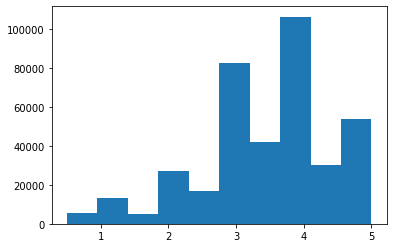

In [ ]:
plt.hist(data_rating['rating'])
plt.show

Observation: 3-4 is the most common rating of the movies

Checking mean rating of the movies

(array([ 254.,  222.,  348.,  694., 1147., 2317., 2939., 2683.,  766.,
         211.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <a list of 10 Patch objects>)

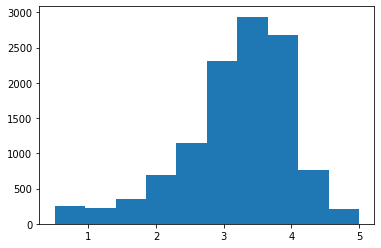

In [ ]:
plt.hist(df.groupby("title").mean()['rating'].sort_values(ascending=False))

As we can see that the ratings and mean ratings are fairly distrubuted, which makes it great for recommendations.

# Creating an user-item table for Item Based Collaborative Fitering

In [ ]:
pivot_table = df.pivot_table(index = ["userId"],columns = ["title"],values = "rating").fillna(0)
pivot_table.head(5)

title,10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),2001: A Space Odyssey (1968),21 Grams (2003),28 Days Later (2002),300 (2007),"40-Year-Old Virgin, The (2005)",50 First Dates (2004),A.I. Artificial Intelligence (2001),About a Boy (2002),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Adaptation (2002),Addams Family Values (1993),"Addams Family, The (1991)","Adventures of Priscilla, Queen of the Desert, The (1994)","African Queen, The (1951)",Air Force One (1997),Airplane! (1980),Akira (1988),Aladdin (1992),Alice in Wonderland (1951),Alien (1979),Alien: Resurrection (1997),Aliens (1986),Alien³ (a.k.a. Alien 3) (1992),Almost Famous (2000),Amadeus (1984),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American Graffiti (1973),American History X (1998),American Pie (1999),American Pie 2 (2001),"American President, The (1995)",American Psycho (2000),"American Werewolf in London, An (1981)",...,Vertigo (1958),"Virgin Suicides, The (1999)",WALL·E (2008),Wag the Dog (1997),Walk the Line (2005),Wallace & Gromit: A Close Shave (1995),Wallace & Gromit: The Best of Aardman Animation (1996),Wallace & Gromit: The Wrong Trousers (1993),"Waterboy, The (1998)",Waterworld (1995),Wayne's World (1992),Wedding Crashers (2005),"Wedding Singer, The (1998)",West Side Story (1961),What Women Want (2000),What's Eating Gilbert Grape (1993),When Harry Met Sally... (1989),While You Were Sleeping (1995),White Men Can't Jump (1992),Who Framed Roger Rabbit? (1988),"Whole Nine Yards, The (2000)",Wild Things (1998),Wild Wild West (1999),William Shakespeare's Romeo + Juliet (1996),Willow (1988),Willy Wonka & the Chocolate Factory (1971),Witness (1985),"Wizard of Oz, The (1939)",Wonder Boys (2000),"World Is Not Enough, The (1999)","X-Files: Fight the Future, The (1998)",X-Men (2000),X-Men: The Last Stand (2006),X2: X-Men United (2003),You've Got Mail (1998),Young Frankenstein (1974),Young Guns (1988),Zoolander (2001),eXistenZ (1999),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,3.5,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,3.0,3.0,0.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0
11,5.0,3.5,0.0,0.0,0.0,4.5,5.0,5.0,5.0,4.5,5.0,5.0,0.0,3.5,3.5,0.0,4.0,3.5,0.0,0.0,0.0,0.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,3.5,5.0,0.0,0.0,4.0,3.0,0.0,2.0,4.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0
14,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.5,0.0,3.0,0.0,0.0,0.0,0.0,3.5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pivot_table.shape

(1001, 801)

# Recommending Movies using Pearson Correlation

In [ ]:
#The function returns top 5 movies with highest correlation
def recommend_movie(movie):
    movie_watched = pivot_table[movie]
    similarity_with_other_movies = pivot_table.corrwith(movie_watched,method='pearson')  
    similarity_with_other_movies = similarity_with_other_movies.sort_values(ascending=False)
    return similarity_with_other_movies.head(6)

In [ ]:
recommend_movie('American President, The (1995)')

title
American President, The (1995)    1.000000
Dave (1993)                       0.487456
Sleepless in Seattle (1993)       0.420141
Firm, The (1993)                  0.392130
While You Were Sleeping (1995)    0.380597
Ghost (1990)                      0.366980
dtype: float64

In [ ]:
recommend_movie('Sleepless in Seattle (1993)')

title
Sleepless in Seattle (1993)       1.000000
While You Were Sleeping (1995)    0.539349
Pretty Woman (1990)               0.501169
Ghost (1990)                      0.491204
Mrs. Doubtfire (1993)             0.461035
Dave (1993)                       0.458977
dtype: float64

Observation: 'The American President' recommends movies like Sleepless in Seattle, dave and Ghost.
Dave,Ghost and The American President again appears in the recommendation of Sleepless in Seattle.

So the movie recommendation seems to work fine.

In [57]:
recommend_movie('Jurassic Park III (2001)')

title
Jurassic Park III (2001)                    1.000000
Planet of the Apes (2001)                   0.398838
Lost World: Jurassic Park, The (1997)       0.364072
Mummy Returns, The (2001)                   0.364030
Final Fantasy: The Spirits Within (2001)    0.359410
Lara Croft: Tomb Raider (2001)              0.354395
dtype: float64

# Recommending Movies With KNN

In [ ]:
# Libraries for Recommendation System
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

Building a user vs item matrix

In [ ]:
user_movie_table = df.pivot_table(index = ["title"],columns = ["userId"],values = "rating").fillna(0)
user_movie_table.head(10)

userId,1,3,7,11,14,18,21,22,23,24,25,29,31,35,46,51,53,54,56,58,61,69,70,73,77,82,88,89,90,91,96,101,103,104,109,112,116,124,129,130,...,2494,2496,2497,2502,2507,2509,2511,2513,2514,2515,2517,2518,2523,2529,2540,2542,2543,2544,2545,2546,2549,2550,2555,2556,2558,2561,2565,2568,2570,2573,2574,2577,2580,2581,2584,2586,2590,2591,2595,2601
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,3.5,0.0,0.0,4.5,3.0,0.0,0.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,4.5,0.0,0.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,4.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,5.0,4.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,3.5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
2001: A Space Odyssey (1968),3.5,5.0,3.0,0.0,3.5,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,5.0,0.0,0.0,0.0,3.0,5.0,4.5,4.0,0.0,0.0,2.5,3.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,3.5,4.5,0.0,0.0,4.0,5.0,3.0,0.0,0.0,0.0,3.5,0.0,0.0,2.5,4.0,5.0,0.0,0.0,0.0,4.5,0.0,0.0,4.0,5.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
21 Grams (2003),0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,4.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
28 Days Later (2002),3.5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.5,0.0,0.0,0.0,3.5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,2.0,3.5,0.0,3.5,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,2.5,4.5,0.0,0.0,4.5,4.0,0.0
300 (2007),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,1.5,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,4.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.5,1.5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0
"40-Year-Old Virgin, The (2005)",0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,2.5,0.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.5,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0


In [54]:
query_index = np.random.choice(user_movie_table.shape[0])
print("Choosen Movie is: ",user_movie_table.index[query_index])

Choosen Movie is:  Jurassic Park III (2001)


In [55]:
user_movie_table_matrix = csr_matrix(user_movie_table.values)
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(user_movie_table_matrix)
distances, indices = model_knn.kneighbors(user_movie_table.iloc[query_index,:].values.reshape(1,-1), n_neighbors = 6)

In [56]:
movie = []
distance = []

for i in range(0, len(distances.flatten())):
    if i != 0:
        movie.append(user_movie_table.index[indices.flatten()[i]])
        distance.append(distances.flatten()[i])    

m=pd.Series(movie,name='movie')
d=pd.Series(distance,name='distance')
recommend = pd.concat([m,d], axis=1)
recommend = recommend.sort_values('distance',ascending=False)

print('Recommendations for {0}:\n'.format(user_movie_table.index[query_index]))
for i in range(0,recommend.shape[0]):
    print('{0}: {1}, with distance of {2}'.format(i, recommend["movie"].iloc[i], recommend["distance"].iloc[i]))

Recommendations for Jurassic Park III (2001):

0: Lara Croft: Tomb Raider (2001), with distance of 0.5809493911205397
1: Final Fantasy: The Spirits Within (2001), with distance of 0.5788504111645943
2: Mummy Returns, The (2001), with distance of 0.5709233640228519
3: Lost World: Jurassic Park, The (1997), with distance of 0.5503615344426318
4: Planet of the Apes (2001), with distance of 0.535639580913791


Both Recommendtion systems have similar prediction.
All these recommendations are matching to a large extent with the recommendations made by Google.